In [1]:
# Common imports
import numpy as np
import pandas as pd
import sklearn as sk
import scipy.stats as sps
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# Set plotting options
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Goal

This dataset was downloaded from Kaggle and has around 145,000 rows of weather information from different states in Australia. There are 23 features in total, 2 of which are labels for whether or not it rains the day of and the day after the data is collected. For the purpose of this project, only 20,000 rows will be used to try to predict RainTomorrow.

Source: https://www.kaggle.com/trisha2094/weatheraus

# Read in the file

In [2]:
# read in the csv file
df = pd.read_csv ("weatherAUS.csv")
print (df.shape)
pd.DataFrame.head (df)

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [56]:
# make a copy of the dataset
df1 = df.copy()

# Dataframe.describe
Looking at the count of each features, we can tell that there are missing values which needs to be dealth with. 
Some features like Rainfall, Evaporation has a huge range
Features like Temp3pm could reach the max of 46.7
Everything else looks to be normal

In [57]:
df1.describe(exclude=[object])

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Cleaning the data
We decided to remove certain features that do no contribute and/or is not of focus for this particular project. Features like Date and Location can be further studied as a later project. We are also removing RainToday since our main objective to predict whether or not it rains the next day.

Checking for missing data in percentage. Per Dr.Phil, remove feature with 20% or more missing data

In [58]:
# drop features that won't be used in the model
df1.drop(['Date', 'Location', 'RainToday'], axis = 1, inplace = True)

In [59]:
# check for na/null value in the dataset
# result is displayed in percentage %
df1.isna().sum() / len(df) * 100

MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainTomorrow      2.245978
dtype: float64

# Dealing with missing values
Since RainTomorrow is our label and it has 2% missing data, we decided to delete all rows that has missing label. This decision is made since assigning label to the missing rows would not make sense when trying to "predict" it.
We also decided to drop the Date column as we are not interested in such information for this project. Perhaps for future projects this can be included for a more insightful information.

In [60]:
# drop any features with 20% or more missing data
df1.drop(['Evaporation','Sunshine', 'Cloud9am', 'Cloud3pm'], axis = 1, inplace = True)

In [61]:
# since RainTomorrow is the label variable and only 2% of its data is missing
# we decided to remove rows that has missing label
# this is because trying to give a row a label defeats the purpose of our predicting model
df1 = df1[df1.RainTomorrow.notnull()]

In [62]:
# since the rest of the features have low % of missing value
# dropping all missing value

# looping through each column to achieve the goal
df1_Columns = df1.columns
for column in df1_Columns:
    df1 = df1[df1[column].notnull()]

In [63]:
# double checking if there are any missing values
# it seems like now the dataset is clean of missing value
df1.isna().sum() / len(df) * 100

MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
RainTomorrow     0.0
dtype: float64

In [64]:
# checking the shape to see how many rows and columns are left
# the cleaning process got rid of around 30,000 rows and 5 columns
# still plenty to work with
df1.shape

(112925, 16)

# Trimming the data
We decided to keep 20,000 rows out of the +112,000 rows. This is for the purpose of speed when running models.
We first wanted to randomize the dataset before subsetting it but we realized that everytime the notebook is reloaded, we would get a different result and therefore, our comment might not make sense. We could figure out how to set a random_seed for the randomizer.

Therefore, we decided to take the last 20,000 rows out of the +112,000 rows

In [65]:
# 112k rows is too much it might be slow further down when processing
# only keeping the last 20k rows
df1 = df1.drop(df1.index[20000:])
df1.shape

(20000, 16)

# Exploring the dataset

In [208]:
df1.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No


<AxesSubplot:>

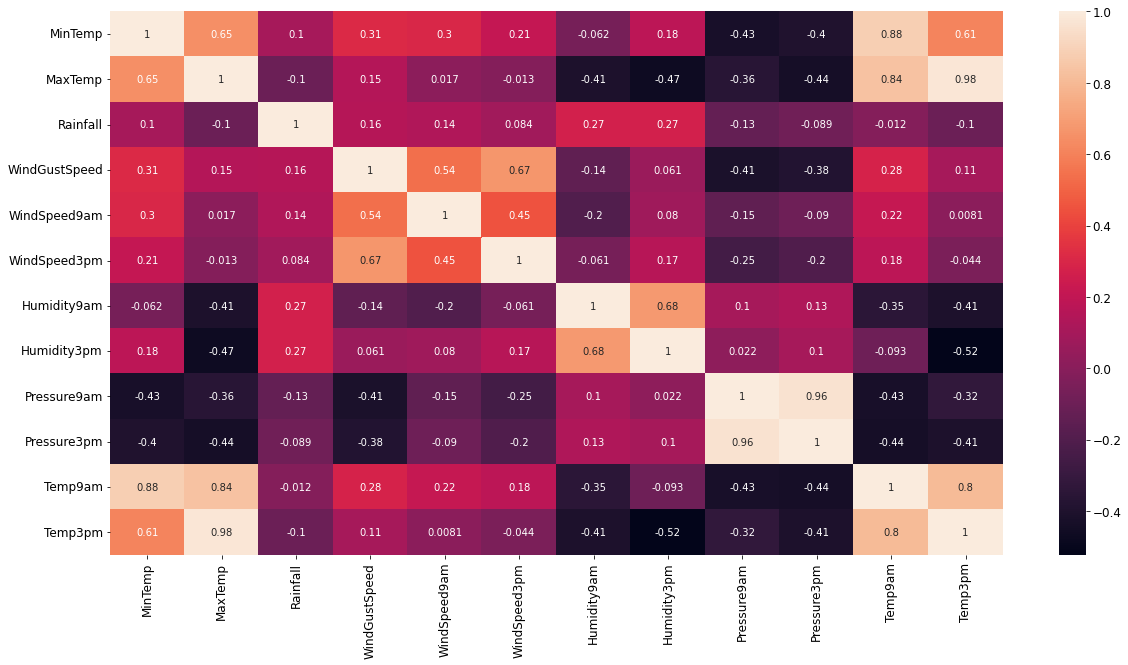

In [67]:
# exploring the correlation of the data features
# we decided to use the seaborn heatmap

var_Corr = df1.corr()
# plot the heatmap and annotation on it
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(var_Corr, xticklabels=var_Corr.columns, yticklabels=var_Corr.columns, annot=True, ax=ax)

There are some features with correlation >0.9 like the temperature columns. Some wind columns have some correlation but not as strong. It also doesn't look like there are any columns with too low correlation value. The lowest we can spot is -0.52

No     15563
Yes     4437
Name: RainTomorrow, dtype: int64
No     77.815
Yes    22.185
Name: RainTomorrow, dtype: float64


<AxesSubplot:title={'center':'Label variable count'}, xlabel='Rain Label', ylabel='Instance Count'>

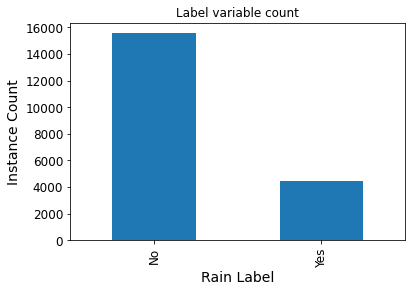

In [68]:
# explore the frequency of the target variable RainTomorrow
# it looks imbalance

# first data shown as count of instances
# second data shown in percentage %
print(df1.RainTomorrow.value_counts())
print(df1.RainTomorrow.value_counts(normalize=True)*100)
df1['RainTomorrow'].value_counts().plot(kind="bar", title="Label variable count", xlabel="Rain Label", ylabel="Instance Count")

It is clear that the label variable is not even. But we will keep it as is since it defeats the purpose if we try to change it.

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>],
       [<AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>],
       [<AxesSubplot:title={'center':'Pressure3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

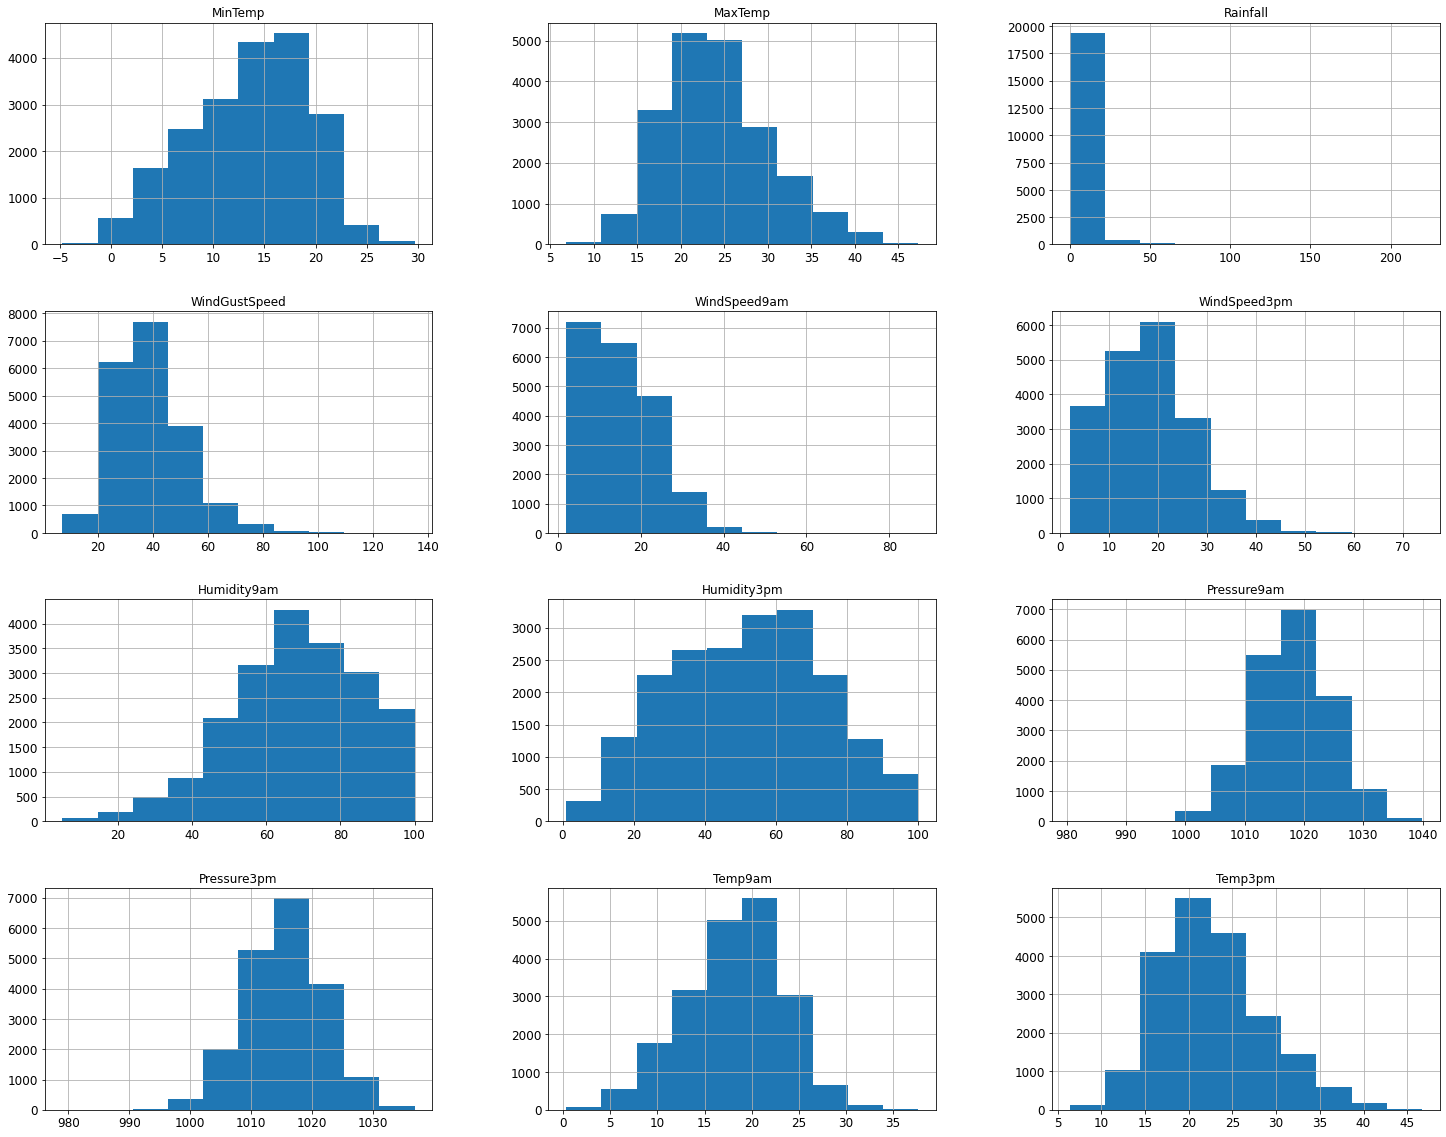

In [69]:
# histograms of all quantitative features
# specifying quantitative columns is not necessary
# it seems plt.hist pnly graphs the quantitative ones
df1.hist(bins=10, figsize=(25, 20))

Some of these features are not evenly distributed. To decide which features we want to log-transform, to hopefully get rid of the skewneess, we check for the skew value

In [70]:
# checking the skewness of each quantitative columns
df1.skew(axis=0)
# from Google: 
# If the absolute value of skew<0.5 then very symmetric. 
# If the absolute value of skew is greater than 1 then very skewed.

MinTemp         -0.349294
MaxTemp          0.524638
Rainfall         7.983992
WindGustSpeed    0.878281
WindSpeed9am     0.825114
WindSpeed3pm     0.747602
Humidity9am     -0.364736
Humidity3pm     -0.012265
Pressure9am     -0.067690
Pressure3pm     -0.060640
Temp9am         -0.230862
Temp3pm          0.566695
dtype: float64

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>],
       [<AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>,
        <AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>],
       [<AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>],
       [<AxesSubplot:title={'center':'log_MaxTemp'}>,
        <AxesSubplot:title={'center':'log_WindGustSpeed'}>,
        <AxesSubplot:title={'center':'log_WindSpeed9am'}>,
        <AxesSubplot:title={'center':'log_WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'log_Temp3pm'}>,
        <AxesSubplot:title={'center':'log_Rainfall'}>, <AxesSubplot:>,
      

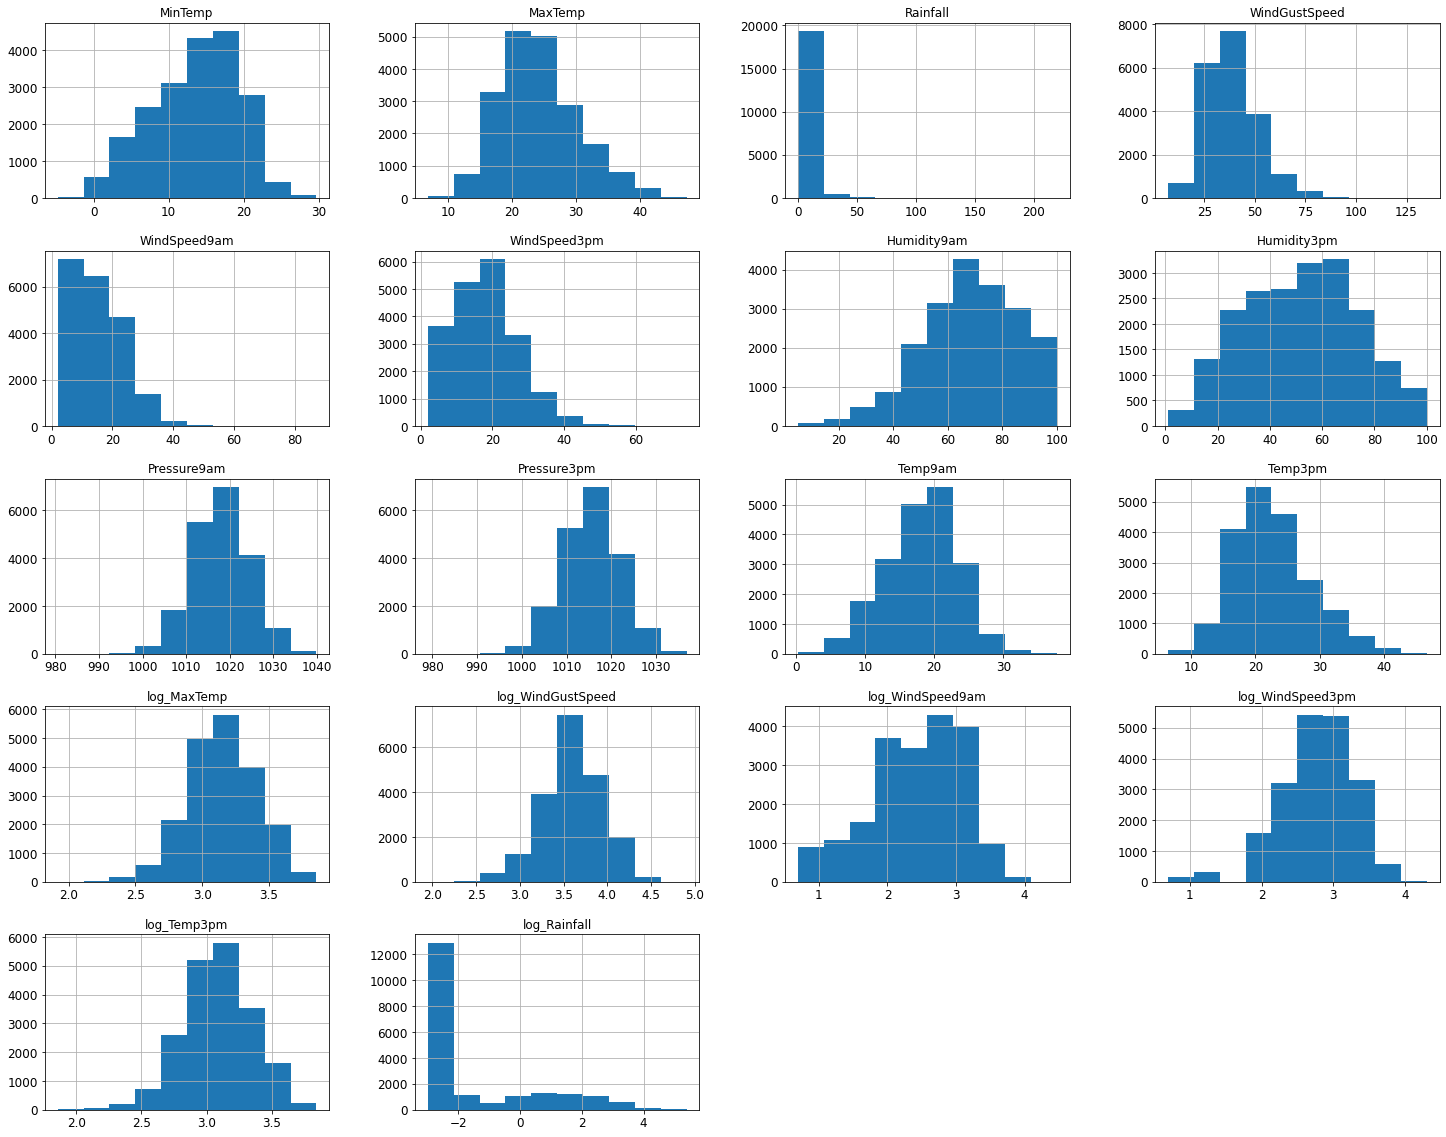

In [71]:
df2 = df1.copy()
# log-transform some quantitative features with skewness >0.5
# create new log column for each features that needs to be log-transformed
df2["log_MaxTemp"] = np.log(df2["MaxTemp"])
# cannot do Rainfall since it has 0 and log of 0 is undefined
df2["log_WindGustSpeed"] = np.log(df2["WindGustSpeed"])
df2["log_WindSpeed9am"] = np.log(df2["WindSpeed9am"])
df2["log_WindSpeed3pm"] = np.log(df2["WindSpeed3pm"])
df2["log_Temp3pm"] = np.log(df2["Temp3pm"])
# Rainfall is special. When we tried log-transforming as it, we got an error.
# Dr.Phil kindly suggested that we increment it by a small amount
df2["log_Rainfall"] = np.log(df2["Rainfall"]+0.05)


# checking the hist to see the differences
df2.hist(bins=10, figsize=(25, 20))

Checking the skewness value again, the log_Rainfall is still skew but is far better than before.

In [72]:
# log_Rainfall is still skewed but the skewness is a lot better
# so we decided to keep the log and move on
df2.skew(axis=0)

MinTemp             -0.349294
MaxTemp              0.524638
Rainfall             7.983992
WindGustSpeed        0.878281
WindSpeed9am         0.825114
WindSpeed3pm         0.747602
Humidity9am         -0.364736
Humidity3pm         -0.012265
Pressure9am         -0.067690
Pressure3pm         -0.060640
Temp9am             -0.230862
Temp3pm              0.566695
log_MaxTemp         -0.178657
log_WindGustSpeed   -0.176186
log_WindSpeed9am    -0.741347
log_WindSpeed3pm    -0.759224
log_Temp3pm         -0.178620
log_Rainfall         1.196866
dtype: float64

In [73]:
# dropping features that are already log-transformed
df3 = df2.copy()
df3.drop(['MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Temp3pm'], axis = 1, inplace = True)

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>],
       [<AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>],
       [<AxesSubplot:title={'center':'log_MaxTemp'}>,
        <AxesSubplot:title={'center':'log_WindGustSpeed'}>,
        <AxesSubplot:title={'center':'log_WindSpeed9am'}>],
       [<AxesSubplot:title={'center':'log_WindSpeed3pm'}>,
        <AxesSubplot:title={'center':'log_Temp3pm'}>,
        <AxesSubplot:title={'center':'log_Rainfall'}>]], dtype=object)

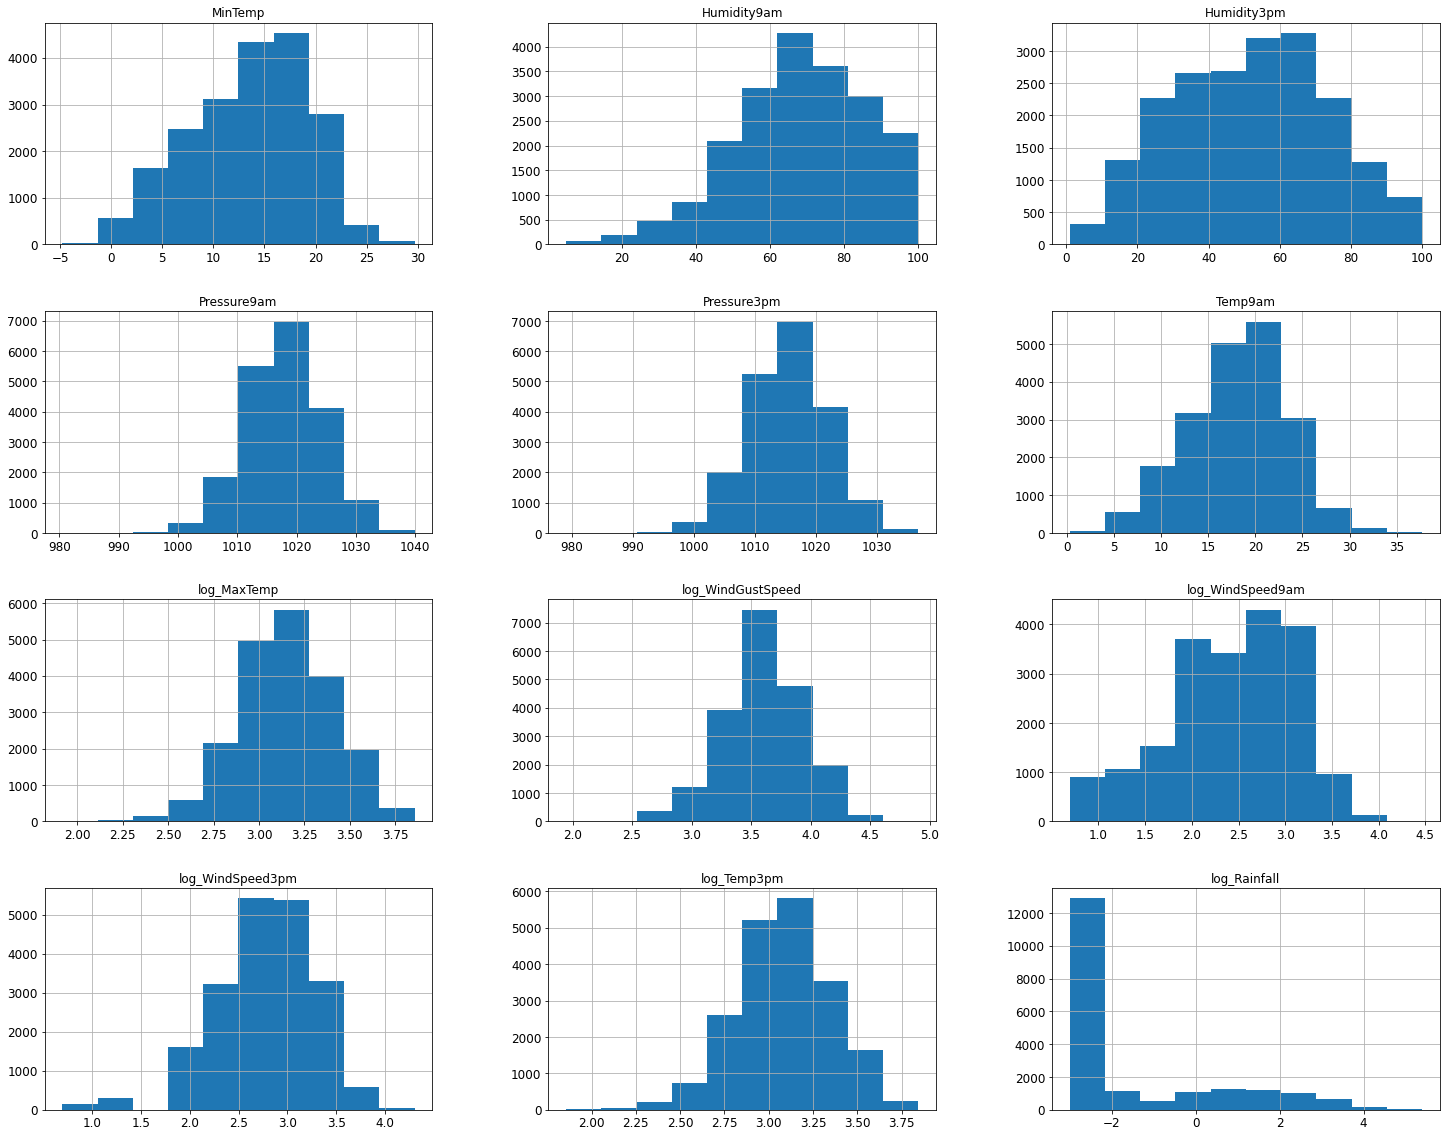

In [74]:
# histogram of the features of the latest dataframe
df3.hist(bins=10, figsize=(25, 20))

In [75]:
#checking categorical features to make decision about binning and one-hot encoding
df3.WindGustDir.value_counts()

NNE    1703
SW     1674
NE     1625
E      1546
S      1467
SSW    1456
WSW    1426
ENE    1356
W      1314
SSE    1164
SE     1117
ESE    1049
WNW    1019
N       886
NW      654
NNW     544
Name: WindGustDir, dtype: int64

In [76]:
#checking categorical features to make decision about binning and one-hot encoding
df3.WindDir9am.value_counts()

SW     2064
NNE    1597
E      1470
SSW    1413
N      1382
NE     1376
WSW    1371
SE     1249
S      1221
ENE    1151
ESE    1138
SSE    1103
W       929
NW      871
NNW     844
WNW     821
Name: WindDir9am, dtype: int64

In [77]:
#checking categorical features to make decision about binning and one-hot encoding
df3.WindDir3pm.value_counts()

NE     1814
S      1606
SE     1546
E      1425
SSE    1363
SW     1308
NNE    1295
ESE    1286
SSW    1248
ENE    1239
W      1234
WSW    1172
WNW    1091
N      1035
NW      757
NNW     581
Name: WindDir3pm, dtype: int64

We decided to just one-hot encode everything instead of categorizing them into a smaller bin. Maybe that could be an idea for future project if interested.

In [78]:
# making a new copy for one-hot encoding of the categorical features
df4 = df3.copy()
# getting all categorical column names into a variable
objectColumns = df4.select_dtypes(include=["object"]).columns
print(objectColumns)
df4.shape

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow'], dtype='object')


(20000, 16)

In [79]:
featureColumns = objectColumns[0:3]
print(featureColumns)

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')


In [80]:
# one-hot encoding all the categorical features
oneHot = pd.get_dummies(df4[featureColumns],prefix=featureColumns)

In [81]:
# merge the one-hot column into the main dataframe using concat
df4 = pd.concat([df4, oneHot], axis=1)

In [82]:
# drop the old categorical features since we now have the one-hot encoded already
df4.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm'], axis = 1, inplace = True)

In [83]:
# it seems the pre-process added 61-16=45 new columns
# (16*3=48 for direction features and -3 for removing the old non one-hot columns)
df4.shape

(20000, 61)

Changing the value of the label variable from "Yes" to 1 and "No" to 0

In [84]:
df5 = df4.copy()
df5['RainTomorrow'] = df5['RainTomorrow'].map({'Yes':1 ,'No':0})
df5.head()

,MinTemp,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,RainTomorrow,log_MaxTemp,log_WindGustSpeed,log_WindSpeed9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,71.0,22.0,1007.7,1007.1,16.9,0,3.131137,3.784190,2.995732,...,0,0,0,0,0,0,0,0,1,0
1,7.4,44.0,25.0,1010.6,1007.8,17.2,0,3.222868,3.784190,1.386294,...,0,0,0,0,0,0,0,0,0,1
2,12.9,38.0,30.0,1007.6,1008.7,21.0,0,3.246491,3.828641,2.944439,...,0,0,0,0,0,0,0,0,0,1
3,9.2,45.0,16.0,1017.6,1012.8,18.1,0,3.332205,3.178054,2.397895,...,0,0,0,0,0,0,0,0,0,0
4,17.5,82.0,33.0,1010.8,1006.0,17.8,0,3.475067,3.713572,1.945910,...,0,1,0,0,0,0,0,0,0,0


In [85]:
# Spliting the data 8:2 ratio

from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df5, test_size=0.2, random_state=42)

In [86]:
# assigning X_train, y_train, X_test, y_test
# we are predicting whether or not it rains tomorrow

X_train = training_data.drop(['RainTomorrow'], axis = 1)
y_train = training_data[['RainTomorrow']]
X_test = testing_data.drop(['RainTomorrow'], axis = 1)
y_test = testing_data[['RainTomorrow']]

# SVM

Since SVM is known to work better with scaled data, we decided to scale our data before implementing the model

In [87]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
# flatten y_train
y_train_1d = np.ndarray.flatten(y_train.values)

In [89]:
y_train_1d.shape

(16000,)

In [90]:
# fitting SVM model to the dataset using SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix

clf_svm = SVC(kernel = "rbf")
clf_svm.fit(X_train_scaled,y_train_1d)
y_pred_svc_train = clf_svm.predict(X_train_scaled)

accuracy_svc_train = accuracy_score(y_train_1d, y_pred_svc_train)
precision_svc_train = precision_score(y_train_1d, y_pred_svc_train)
recall_svc_train = recall_score(y_train_1d, y_pred_svc_train)

In [91]:
print("Train SVC Accuracy: ", accuracy_svc_train)
print("Train SVC Precision: ", precision_svc_train)
print("Train SVC Recall: ", recall_svc_train)

Train SVC Accuracy:  0.8780625
Train SVC Precision:  0.8549889135254989
Train SVC Recall:  0.5427927927927928


In [92]:
# SVC for test set
y_pred_svc_test = clf_svm.predict(X_test_scaled)

accuracy_svc_test = accuracy_score(y_test, y_pred_svc_test)
precision_svc_test = precision_score(y_test, y_pred_svc_test)
recall_svc_test = recall_score(y_test, y_pred_svc_test)

In [93]:
print("Test SVC Accuracy: ", accuracy_svc_test)
print("Test SVC Precision: ", precision_svc_test)
print("Test SVC Recall: ", recall_svc_test)

Test SVC Accuracy:  0.84975
Test SVC Precision:  0.7508833922261484
Test SVC Recall:  0.480225988700565


The score on the training set is only marginally better than the score on the test set. The decrease in performance on the test set is generally expected.

<AxesSubplot:>

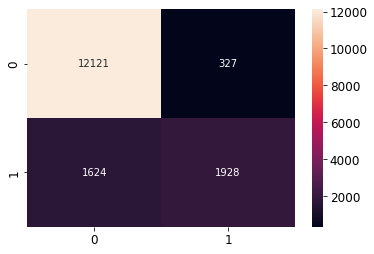

In [94]:
# confusion matrix for SVC train set
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train_1d, y_pred_svc_train)
sns.heatmap(conf_matrix, annot=True, fmt="d")

<AxesSubplot:>

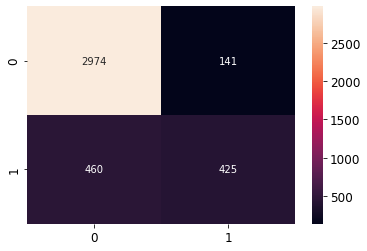

In [95]:
# confusion matrix for SVC train set

conf_matrix = confusion_matrix(y_test, y_pred_svc_test)
sns.heatmap(conf_matrix, annot=True, fmt="d")

In [98]:
# Calculate Cross Validation for the data using cross_val_score
from sklearn.model_selection import cross_val_score

accuracy_svc_cv = cross_val_score(clf_svm, X_train_scaled, y_train_1d, cv=5, scoring="accuracy")
precision_svc_cv = cross_val_score(clf_svm, X_train_scaled, y_train_1d, cv=5, scoring="precision")
recall_svc_cv = cross_val_score(clf_svm, X_train_scaled, y_train_1d, cv=5, scoring="recall")

In [126]:
print("SVC CV Accuracy: " , accuracy_svc_cv)
print("SVC CV Precision: " , precision_svc_cv)
print("SVC CV Recall: " , recall_svc_cv)

SVC CV Accuracy:  [0.8459375 0.8425    0.8521875 0.844375  0.851875 ]
SVC CVPrecision:  [0.73741794 0.74407583 0.78147268 0.75662651 0.76391982]
SVC CV Recall:  [0.47464789 0.44225352 0.46338028 0.4416315  0.48241913]


In [158]:
# Calculate Cross Validation for the data using cross_val_predict for a more synthesized result
from sklearn.model_selection import cross_val_predict

cv_pred = cross_val_predict(clf_svm, X_train_scaled, y_train_1d, cv=5)

accuracy_svc_cv_syn = accuracy_score(y_train_1d,cv_pred)
precision_svc_cv_syn = precision_score(y_train_1d,cv_pred)
recall_svc_cv_syn = recall_score(y_train_1d,cv_pred)

In [159]:
print("Accuracy: " , accuracy_svc_cv_syn)
print("Precision: " , precision_svc_cv_syn)
print("Recall: " , recall_svc_cv_syn)

Accuracy:  0.847375
Precision:  0.7564695009242144
Recall:  0.46086711711711714


The CV score is slight worse than the normal SVC model. This could happen

<AxesSubplot:>

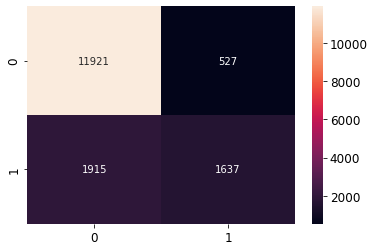

In [160]:
# confusion matrix for SVC CV train set

conf_matrix = confusion_matrix(y_train_1d, cv_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")

<AxesSubplot:>

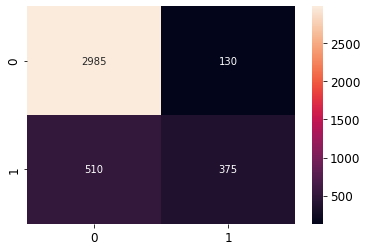

In [161]:
# confusion matrix for SVC CV test set
cv_pred_test = cross_val_predict(clf_svm, X_test_scaled, y_test.values.ravel(), cv=5)

conf_matrix = confusion_matrix(y_test, cv_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt="d")

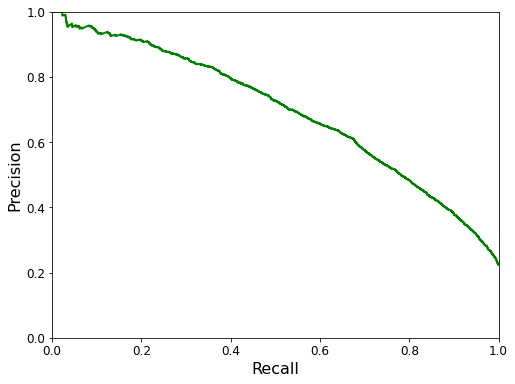

In [162]:
# Make Precision-Recall Plot
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(clf_svm, X_train_scaled, y_train_1d, cv=5, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_1d, y_scores)

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "g-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

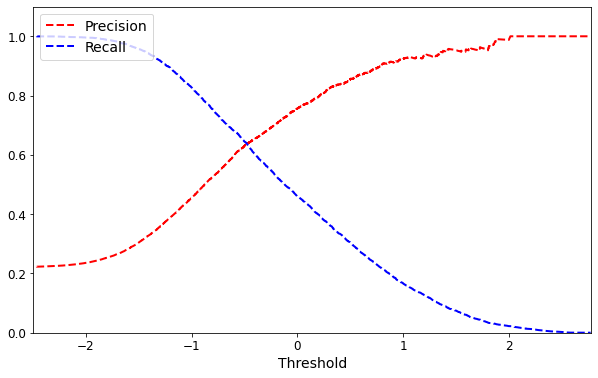

In [163]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "r--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "b--", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.ylim([0, 1.1])

plt.figure(figsize=(10, 6))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-2.5, 2.78])
plt.show()

Precision and Recall converges around 0.6

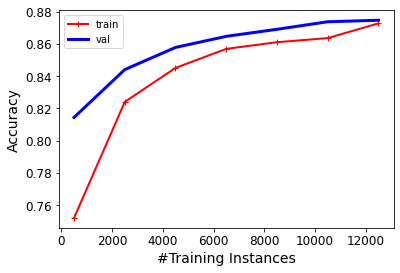

In [164]:
# Learning Curve plot using Precision
startobs = 500
increment = 2000

def plot_learning_curves(model, X, y, score_fun, score_label):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)
    train_score,val_score, n_obs = [], [], []
    for m in range (startobs, len(X_train), increment):
        model.fit(X[:m], y[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_score.append(score_fun(y_train[:m], y_train_predict))
        val_score.append(score_fun(y_val, y_val_predict))
        n_obs.append(m)
        
    plt.plot(n_obs, train_score, "r-+", linewidth=2, label = "train")
    plt.plot(n_obs, val_score, "b-", linewidth = 3, label = "val")
    plt.legend()
    plt.xlabel("#Training Instances")
    plt.ylabel(score_label)

#check y train 0 variable

plot_learning_curves(clf_svm, X_train_scaled, y_train_1d, accuracy_score, "Accuracy")

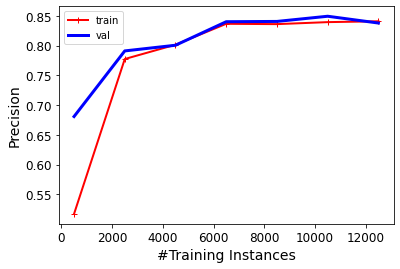

In [165]:
# Learning Curve plot using Precision
startobs = 500
increment = 2000

def plot_learning_curves(model, X, y, score_fun, score_label):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)
    train_score,val_score, n_obs = [], [], []
    for m in range (startobs, len(X_train), increment):
        model.fit(X[:m], y[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_score.append(score_fun(y_train[:m], y_train_predict))
        val_score.append(score_fun(y_val, y_val_predict))
        n_obs.append(m)
        
    plt.plot(n_obs, train_score, "r-+", linewidth=2, label = "train")
    plt.plot(n_obs, val_score, "b-", linewidth = 3, label = "val")
    plt.legend()
    plt.xlabel("#Training Instances")
    plt.ylabel(score_label)

#check y train 0 variable

plot_learning_curves(clf_svm, X_train_scaled, y_train_1d, precision_score, "Precision")

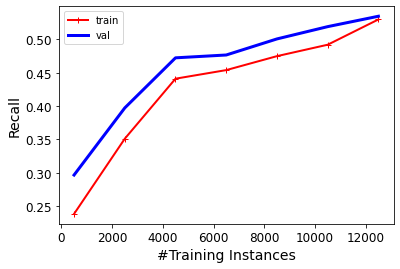

In [166]:
# Learning Curve plot using Precision
startobs = 500
increment = 2000

def plot_learning_curves(model, X, y, score_fun, score_label):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)
    train_score,val_score, n_obs = [], [], []
    for m in range (startobs, len(X_train), increment):
        model.fit(X[:m], y[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_score.append(score_fun(y_train[:m], y_train_predict))
        val_score.append(score_fun(y_val, y_val_predict))
        n_obs.append(m)
        
    plt.plot(n_obs, train_score, "r-+", linewidth=2, label = "train")
    plt.plot(n_obs, val_score, "b-", linewidth = 3, label = "val")
    plt.legend()
    plt.xlabel("#Training Instances")
    plt.ylabel(score_label)

#check y train 0 variable

plot_learning_curves(clf_svm, X_train_scaled, y_train_1d, recall_score, "Recall")

Above, we made learning curve for all accuracy, precision and recall. If we look at the precision learning curve, the train and validation set converges at around 0.82 which is an indication that the model is doing alright. Although not perfect, it is way better than a coin toss. This is a sign of machine learning.

# Random Forest

In [167]:
# scaling is not necessary for RandomForest
from sklearn.ensemble import RandomForestClassifier

# these 2 hyper-parameters will be later adjusted to see the different results
rnf_clf = RandomForestClassifier(n_estimators = 5, max_depth = 10)
rnf_clf.fit(X_train, y_train_1d)
# scaling is not necessary for rf
y_pred_rf_train = rnf_clf.predict(X_train)

In [168]:
acc_train_rf_train = accuracy_score(y_train_1d, y_pred_rf_train)
prec_train_rf_train = precision_score(y_train_1d, y_pred_rf_train)
rec_train_rf_train = recall_score(y_train_1d, y_pred_rf_train)

In [169]:
print("Train RF Accuracy: ", acc_train_rf_train)
print("Train RF Precision: ", prec_train_rf_train)
print("Train RF Recall: ", rec_train_rf_train)

Train RF Accuracy:  0.869
Train RF Precision:  0.8699186991869918
Train RF Recall:  0.481981981981982


<AxesSubplot:>

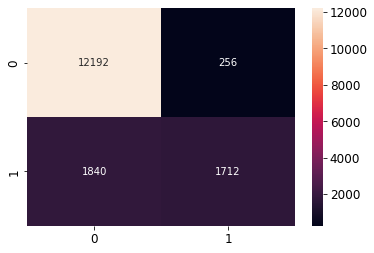

In [170]:
# confusion matrix for RF train set
conf_matrix_rf = confusion_matrix(y_train_1d, y_pred_rf_train)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d")

In [171]:
# RF for test set
y_predict_rf_test = rnf_clf.predict(X_test)

acc_test_rf = accuracy_score(y_test, y_predict_rf_test)
prec_test_rf = precision_score(y_test, y_predict_rf_test)
rec_test_rf = recall_score(y_test, y_predict_rf_test)

In [172]:
print("Test RF Accuracy: ", acc_test_rf)
print("Test RF Precision: ", prec_test_rf)
print("Test RF Recall: ", rec_test_rf)

Test RF Accuracy:  0.836
Test RF Precision:  0.744136460554371
Test RF Recall:  0.3943502824858757


<AxesSubplot:>

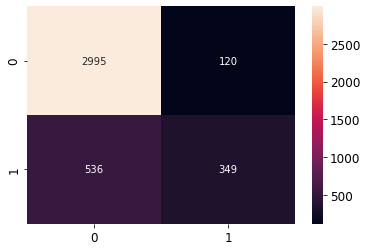

In [173]:
# confusion matrix for RF test set
conf_matrix_rf = confusion_matrix(y_test, y_predict_rf_test)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d")

In [174]:
# Accuracy, Precision, Recall of RF with CV of 5 folds
from sklearn.model_selection import cross_val_score

accuracy_rf_cv = cross_val_score(rnf_clf, X_train, y_train_1d, cv=5, scoring="accuracy")
precision_rf_cv = cross_val_score(rnf_clf, X_train, y_train_1d, cv=5, scoring="precision")
recall_rf_cv = cross_val_score(rnf_clf, X_train, y_train_1d, cv=5, scoring="recall")

In [175]:
print("Accuracy: " , accuracy_rf_cv)
print("Precision: " , precision_rf_cv)
print("Recall: " , recall_rf_cv)

Accuracy:  [0.8396875 0.83875   0.8365625 0.8325    0.8415625]
Precision:  [0.71393035 0.75578406 0.79726027 0.72681704 0.7425    ]
Recall:  [0.42394366 0.42535211 0.41971831 0.41209564 0.45147679]


In [176]:
rf_cv_pred = cross_val_predict(rnf_clf, X_train, y_train_1d, cv=5)

accuracy_rf_cv_syn = accuracy_score(y_train_1d, rf_cv_pred)
precision_rf_cv_syn = precision_score(y_train_1d, rf_cv_pred)
recall_rf_cv_syn = recall_score(y_train_1d, rf_cv_pred)

In [177]:
print("Accuracy: " , accuracy_rf_cv_syn)
print("Precision: " , precision_rf_cv_syn)
print("Recall: " , recall_rf_cv_syn)

Accuracy:  0.8401875
Precision:  0.7425646026328621
Recall:  0.4287725225225225


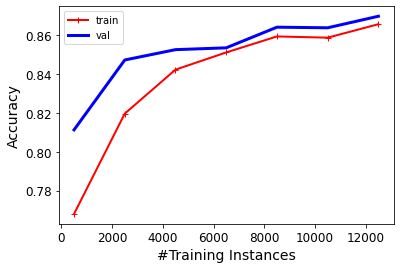

In [180]:
# Learning Curve plot using Precision
startobs = 500
increment = 2000

def plot_learning_curves(model, X, y, score_fun, score_label):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)
    train_score,val_score, n_obs = [], [], []
    for m in range (startobs, len(X_train), increment):
        model.fit(X[:m], y[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_score.append(score_fun(y_train[:m], y_train_predict))
        val_score.append(score_fun(y_val, y_val_predict))
        n_obs.append(m)
        
    plt.plot(n_obs, train_score, "r-+", linewidth=2, label = "train")
    plt.plot(n_obs, val_score, "b-", linewidth = 3, label = "val")
    plt.legend()
    plt.xlabel("#Training Instances")
    plt.ylabel(score_label)

#check y train 0 variable

plot_learning_curves(rnf_clf, X_train, y_train_1d, accuracy_score, "Accuracy")

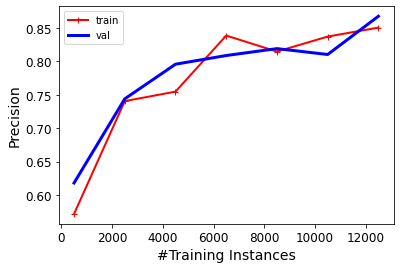

In [182]:
# Learning Curve plot using Precision
startobs = 500
increment = 2000

def plot_learning_curves(model, X, y, score_fun, score_label):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)
    train_score,val_score, n_obs = [], [], []
    for m in range (startobs, len(X_train), increment):
        model.fit(X[:m], y[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_score.append(score_fun(y_train[:m], y_train_predict))
        val_score.append(score_fun(y_val, y_val_predict))
        n_obs.append(m)
        
    plt.plot(n_obs, train_score, "r-+", linewidth=2, label = "train")
    plt.plot(n_obs, val_score, "b-", linewidth = 3, label = "val")
    plt.legend()
    plt.xlabel("#Training Instances")
    plt.ylabel(score_label)

#check y train 0 variable

plot_learning_curves(rnf_clf, X_train, y_train_1d, precision_score, "Precision")

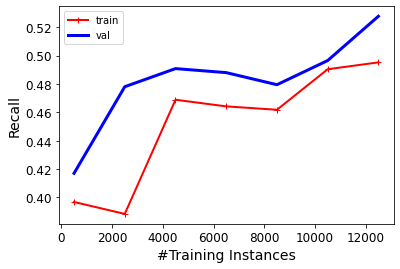

In [183]:
# Learning Curve plot using Precision
startobs = 500
increment = 2000

def plot_learning_curves(model, X, y, score_fun, score_label):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)
    train_score,val_score, n_obs = [], [], []
    for m in range (startobs, len(X_train), increment):
        model.fit(X[:m], y[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_score.append(score_fun(y_train[:m], y_train_predict))
        val_score.append(score_fun(y_val, y_val_predict))
        n_obs.append(m)
        
    plt.plot(n_obs, train_score, "r-+", linewidth=2, label = "train")
    plt.plot(n_obs, val_score, "b-", linewidth = 3, label = "val")
    plt.legend()
    plt.xlabel("#Training Instances")
    plt.ylabel(score_label)

#check y train 0 variable

plot_learning_curves(rnf_clf, X_train, y_train_1d, recall_score, "Recall")

# 8 Fine Tuning

Since the two model is comparable, we decided to go with Random Forest to further improve the performance of the model.

In [207]:
# Fine tuning the random forest classifier
rand_f = RandomForestClassifier(n_estimators = 45, max_depth = 65)
rand_f.fit(X_train,y_train_1d)
y_pred = rand_f.predict(X_train)
prec_train = precision_score(y_train_1d,y_pred)
rec_train = recall_score(y_train_1d,y_pred)
print(prec_train,rec_train)

0.9994364609749226 0.9985923423423423


In [198]:
# # Manually calculating grid-search
# # Values change after each run
# 2, 60 = 0.9760357432981316 0.6765202702702703
# 4, 40 = 0.9869684499314129 0.8102477477477478
# 5, 100 = 0.972452606635071 0.9242680180180181
# 5, 1000 = 0.9711051534107834 0.9177927927927928
# 10, 15 = 0.9714714714714715 0.7286036036036037
# 15, 20 = 0.9956696566656357 0.90625
# 20, 25 = 0.9991349480968859 0.9755067567567568
# 25, 30 = 0.9988633134413185 0.9895833333333334
# 20, 35 = 0.9997140406062339 0.9842342342342343
# 25, 40 = 0.9988684582743989 0.9940878378378378
# 30, 45 = 1.0 0.990990990990991
# 35, 50 = 1.0 0.9966216216216216
# 40, 55 = 1.0 0.9966216216216216
# 45, 60 = 1.0 0.9994369369369369
# 45, 70 = 0.9997182304874612 0.9988738738738738
# 50, 65 = 1.0 0.9974662162162162
# 55, 70 = 1.0 0.9983108108108109

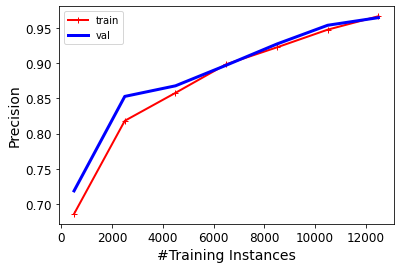

In [209]:
# Learning Curve plot using Precision
startobs = 500
increment = 2000

def plot_learning_curves(model, X, y, score_fun, score_label):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)
    train_score,val_score, n_obs = [], [], []
    for m in range (startobs, len(X_train), increment):
        model.fit(X[:m], y[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_score.append(score_fun(y_train[:m], y_train_predict))
        val_score.append(score_fun(y_val, y_val_predict))
        n_obs.append(m)
        
    plt.plot(n_obs, train_score, "r-+", linewidth=2, label = "train")
    plt.plot(n_obs, val_score, "b-", linewidth = 3, label = "val")
    plt.legend()
    plt.xlabel("#Training Instances")
    plt.ylabel(score_label)

#check y train 0 variable

plot_learning_curves(rand_f, X_train, y_train_1d, precision_score, "Precision")

We can see that by tweaking the 2 hyper-parameters, our learning curve for the Random Forest improves. The precision and recall curves converges at around 0.96 compared to the normal Random Forest at around 0.82.

Overall, the model that we implemented manage to predict the dataset fairly decently. Although it is not a strong prediction, it is a lot better than a random rate. Here are a few things we can do better to further improve the performance of the models.

- Look into the clustering of the label on both train and test set
- Automate the grid-search and see if there is or are any better value of the 2 hyper-parameters
- Randomize the dataset before trimming it